# Predicting STEAM User Engagement

# Data Cleaning

In [93]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import time
from ast import literal_eval

from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [24]:
# reading in the datasets
app = pd.read_csv('./data/data_scraped/steampowered_app_data.csv')
spy = pd.read_csv('./data/data_scraped/steamspy_data.csv')

In [83]:
# shapes the of datasets
print(app.shape)
print(spy.shape)

(29999, 30)
(30019, 20)


Inputing the column titles manually first into the steampowered app data and then steamspy data.

In [26]:
app.columns = ['type', 'name', 'appid', 'required_age', 'free', 'controller_support', 'dlc', 'detailed_description', 'about_the_game', 
               'short_description', 'full_game', 'supported_languages', 'pc_requirements', 'mac_requirements', 'linux_requirements', 
              'developers', 'publishers', 'demos', 'price_overview', 'packages', 'package_groups', 'platforms', 'metacritic', 'reviews', 
              'catagories', 'genres', 'recommendations', 'achievements', 'release_date', 'content_descriptors']

In [27]:
app.head(2)

,type,name,appid,required_age,free,controller_support,dlc,detailed_description,about_the_game,short_description,...,package_groups,platforms,metacritic,reviews,catagories,genres,recommendations,achievements,release_date,content_descriptors
0,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'name': 'default', 'title': 'Buy Team Fortre...","{'windows': True, 'mac': True, 'linux': True}",NaN,NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 3796},NaN,"{'coming_soon': False, 'date': 'Apr 1, 1999'}","{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'name': 'default', 'title': 'Buy Day of Defe...","{'windows': True, 'mac': True, 'linux': True}","{'score': 79, 'url': 'https://www.metacritic.c...",NaN,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]",{'total': 2804},NaN,"{'coming_soon': False, 'date': 'May 1, 2003'}","{'ids': [], 'notes': None}"


In [28]:
spy.columns = ['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive', 'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
    'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount', 'languages', 'genre', 'ccu', 'tags']

In [29]:
spy.head(2)

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,20,Team Fortress Classic,Valve,Valve,NaN,4691,815,0,"2,000,000 .. 5,000,000",92,0,19,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Sp...",Action Games,98,"{'Action': 738, 'FPS': 300, 'Multiplayer': 253..."
1,30,Day of Defeat,Valve,Valve,NaN,4564,500,0,"5,000,000 .. 10,000,000",299,0,47,0,499.0,499.0,0.0,"English, French, German, Italian, Spanish - Spain",Action Games,145,"{'FPS': 778, 'World War II': 244, 'Multiplayer..."


In [30]:
# Merging the two datasets on 'appid' column
df = app.merge(spy, on='appid')

In [31]:
# Right away i'm dropping name_y as it is the same column as name_x and renaming name_x as name
df.drop(columns='name_y', inplace=True)

In [32]:
df.rename(columns={'name_x':'name'}, inplace=True)

In [82]:
# checking dataset shape and data types
print(df.shape)
print(df.dtypes)

(25392, 40)
type                     object
name                     object
appid                     int64
required_age            float64
free                     object
detailed_description     object
about_the_game           object
short_description        object
supported_languages      object
pc_requirements          object
mac_requirements         object
linux_requirements       object
developers               object
publishers               object
price_overview           object
packages                 object
package_groups           object
platforms                object
catagories               object
genres                   object
achievements             object
release_date             object
content_descriptors      object
developer                object
publisher                object
positive                  int64
negative                  int64
userscore                 int64
owners                   object
average_forever           int64
average_2weeks            in

In [84]:
# Checking the % of missing values in each column. 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

type - 0.0%
name - 0.0%
appid - 0.0%
required_age - 0.0%
free - 0.0%
detailed_description - 0.0%
about_the_game - 0.0%
short_description - 0.0%
supported_languages - 0.0%
pc_requirements - 0.0%
mac_requirements - 0.0%
linux_requirements - 0.0%
developers - 0.0%
publishers - 0.0%
price_overview - 19.0%
packages - 18.0%
package_groups - 0.0%
platforms - 0.0%
catagories - 2.0%
genres - 0.0%
achievements - 41.0%
release_date - 0.0%
content_descriptors - 0.0%
developer - 0.0%
publisher - 0.0%
positive - 0.0%
negative - 0.0%
userscore - 0.0%
owners - 0.0%
average_forever - 0.0%
average_2weeks - 0.0%
median_forever - 0.0%
median_2weeks - 0.0%
price - 0.0%
initialprice - 0.0%
discount - 0.0%
languages - 0.0%
genre - 1.0%
ccu - 0.0%
tags - 0.0%


In [35]:
# drop any duplicated rows
df = df.drop_duplicates()

In [79]:
#drop data where over 50% is missing
df.drop(columns=['controller_support', 'dlc', 'full_game', 'demos', 'metacritic', 'reviews', 'recommendations', 'score_rank'], inplace=True)

In [37]:
# saving the new dataframe
df.to_csv('merged_data.csv', index=False)

In [111]:
df = pd.read_csv('merged_data.csv')

In [112]:
# gathering numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['appid' 'required_age' 'positive' 'negative' 'userscore'
 'average_forever' 'average_2weeks' 'median_forever' 'median_2weeks'
 'price' 'initialprice' 'discount' 'ccu']


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  25360 non-null  object 
 1   name                  25390 non-null  object 
 2   appid                 25392 non-null  int64  
 3   required_age          25360 non-null  float64
 4   free                  25360 non-null  object 
 5   detailed_description  25349 non-null  object 
 6   about_the_game        25349 non-null  object 
 7   short_description     25349 non-null  object 
 8   supported_languages   25349 non-null  object 
 9   pc_requirements       25360 non-null  object 
 10  mac_requirements      25360 non-null  object 
 11  linux_requirements    25360 non-null  object 
 12  developers            25276 non-null  object 
 13  publishers            25360 non-null  object 
 14  price_overview        20461 non-null  object 
 15  packages           

Text(0.5, 0, 'Feature Columns')

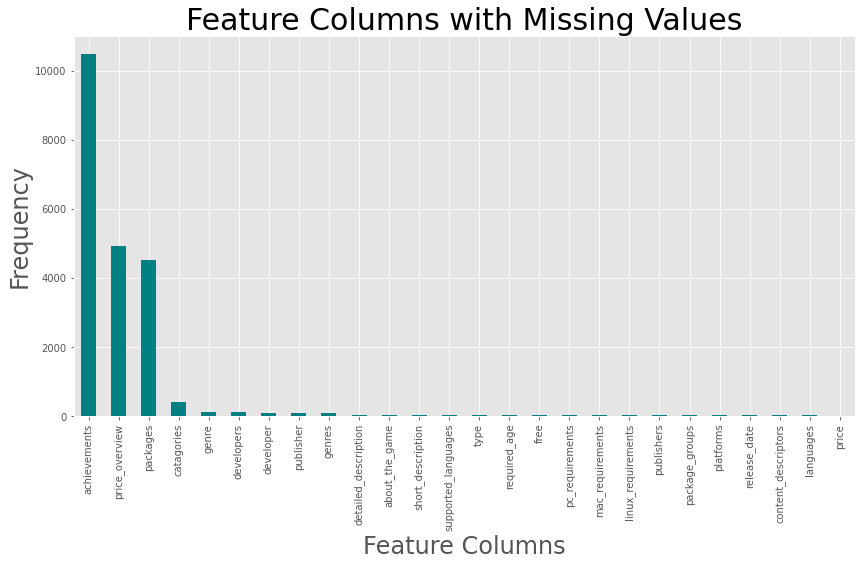

In [114]:
# Looking at remaining null values with a graph 

df_na = np.sum(df.isnull())
df_na[df_na > 0]

plt.figure(figsize=(14, 7))
bar_na = df_na.nlargest(26).plot(kind='bar', color = 'teal')
bar_na.set_ylabel('Frequency', fontsize=24)
bar_na.set_title("Feature Columns with Missing Values", fontsize=30)
bar_na.set_xlabel("Feature Columns", fontsize=24)

In [116]:
# Dropping na under name column
df.dropna(subset=['name'], inplace=True)  

Price Overview, platforms

In [117]:
df.drop(columns=['price_overview', 'packages', 'publisher', 'supported_languages', 'genres', 'developer', 'achievements', 'type'], inplace=True) 

In [118]:
df['platforms'].head()

0    {'windows': True, 'mac': True, 'linux': True}
1    {'windows': True, 'mac': True, 'linux': True}
2    {'windows': True, 'mac': True, 'linux': True}
3    {'windows': True, 'mac': True, 'linux': True}
4    {'windows': True, 'mac': True, 'linux': True}
Name: platforms, dtype: object

In [119]:
df['platforms'].isnull().sum()

32

In [120]:
platforms = {'windows': True, 'mac': True, 'linux': False}

# list comprehension
print([x for x in platforms.keys() if platforms[x]])

# using list comprehension in join
';'.join(x for x in platforms.keys() if platforms[x])

['windows', 'mac']


'windows;mac'

In [121]:
df.dropna(subset=['platforms'], inplace=True)  

In [122]:
def process_platforms(df):
    # evaluate values in platforms column, so can index into dictionaries
    df = df.copy()
    
    def parse_platforms(x):
        
        d = literal_eval(x)
        
        return ';'.join(platform for platform in d.keys() if d[platform])
    
    df['platforms'] = df['platforms'].apply(parse_platforms)
    
    return df


df = process_platforms(df)
df['platforms'].value_counts()

windows              17265
windows;mac;linux     4180
windows;mac           3273
windows;linux          636
mac                      3
mac;linux                1
Name: platforms, dtype: int64

In [131]:
df.dropna(subset=['detailed_description', 'short_description', 'developers', 'genre'], inplace=True)  

In [72]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['name' 'free' 'detailed_description' 'about_the_game' 'short_description'
 'supported_languages' 'pc_requirements' 'mac_requirements'
 'linux_requirements' 'developers' 'publishers' 'price_overview'
 'packages' 'package_groups' 'platforms' 'catagories' 'genres'
 'achievements' 'release_date' 'content_descriptors' 'developer'
 'publisher' 'owners' 'languages' 'genre' 'tags']


In [136]:
df["catagories"].fillna("missing", inplace = True)

In [137]:
df.isnull().sum()

name                    0
appid                   0
required_age            0
free                    0
detailed_description    0
about_the_game          0
short_description       0
pc_requirements         0
mac_requirements        0
linux_requirements      0
developers              0
publishers              0
package_groups          0
platforms               0
catagories              0
release_date            0
content_descriptors     0
positive                0
negative                0
userscore               0
owners                  0
average_forever         0
average_2weeks          0
median_forever          0
median_2weeks           0
price                   0
initialprice            0
discount                0
languages               0
genre                   0
ccu                     0
tags                    0
dtype: int64

In [138]:
df.to_csv('merged_data_clean.csv', index=False)